## 任务1：PCA实现

### 任务介绍：
- 请使用Numpy实现PCA，定义为一个函数pca()
- 函数包含两个参数：dataMat数据矩阵和n_components低维维数，并返回在新空间下的数据矩阵lowdMat和转换矩阵tfMat
- 现已经读取鸢尾花数据iris.csv得到iris，请利用自定义pca()将数据从四维降到二维空间，得到最终的低维数据矩阵iris2d

> 待完善代码

In [11]:
import pandas as pd
import numpy as np
from numpy import linalg as LA

# 读取数据
iris = pd.read_csv('iris.csv', usecols=range(4))

# 定义主成分分析函数
def pca(dataMat, n_components):
    
    # 数据中心化
    meanVals = np.mean(dataMat, axis=0)  # shape(1, 4)
    centered = dataMat - meanVals  # shape(150, 4)
    
    # 计算协方差矩阵，并进行特征值分解
    # 注意，协方差矩阵计算需指定rowvar参数为False，即表明每一列为每一个特征的不同取值
    ## 参考https://blog.csdn.net/m0_68795816/article/details/124575452
    covMat = np.cov(centered, rowvar=False)  # shape(4, 4)
    w, v = LA.eig(covMat)  # 特征值和特征向量    # shape(4,) shape(4, 4)
    
    # 将特征值从大到小排序，并得到对应的索引值序列
    idxMin2Max = np.argsort(w)  # array([3, 2, 1, 0])
    idxMax2Min = idxMin2Max[::-1]  # array([0, 1, 2, 3])
    
    # 根据排序后的索引值序列idxMax2Min提取前n_components个特征向量构成转换矩阵
    # print(idxMax2Min)
    # print(idxMax2Min[:n_components])
    # print(v)
    # print(v[:, idxMax2Min])
    # print(v[:, idxMax2Min][:n_components])
    # print(v[:, idxMax2Min[:n_components]])
    # tfMat = v[:, idxMax2Min[:n_components]]  # 求出来的每一列是特征值, 应该索引前两列值
    # print(v)
    # print(v.T)
    # print(v.T[idxMax2Min])
    # print(v.T[idxMax2Min][:n_components])
    #### 参考https://www.bilibili.com/video/BV1wS4y1f7z1?p=12
    v = v.T  # =============求出来的每一列是特征值, 应该索引前两列值============= #
    v = v[idxMax2Min]  # 这样就可以对行索引排序了
    tfMat = v[:n_components]  # 然后行索引
    # tfMat = tfMat[:n_components]  # n_components×n  shape(2, 4)
    
    # 将原始数据转换到新的低维空间
    lowdMat = np.matmul(dataMat, tfMat.T) # m×n * n×n_components
    
    return lowdMat, tfMat

# 使用自定义pca函数对鸢尾花数据进行降维
irisMat = np.mat(iris)
iris2d, _ = pca(irisMat, 2)

print(iris2d)

[[ 2.82713597 -5.64133105]
 [ 2.79595248 -5.14516688]
 [ 2.62152356 -5.17737812]
 [ 2.7649059  -5.00359942]
 [ 2.78275012 -5.64864829]
 [ 3.23144574 -6.06250644]
 [ 2.69045242 -5.23261922]
 [ 2.8848611  -5.48512908]
 [ 2.62338453 -4.7439257 ]
 [ 2.83749841 -5.20803203]
 [ 3.00481631 -5.96665874]
 [ 2.89820038 -5.33624436]
 [ 2.72390912 -5.08698354]
 [ 2.28614265 -4.81144382]
 [ 2.86779988 -6.50091863]
 [ 3.12747377 -6.65947808]
 [ 2.88881689 -6.13281341]
 [ 2.86302037 -5.6338604 ]
 [ 3.31226514 -6.19396782]
 [ 2.92399691 -5.83519737]
 [ 3.2008114  -5.71259155]
 [ 2.96810819 -5.75475549]
 [ 2.2954854  -5.4563393 ]
 [ 3.20821456 -5.42024641]
 [ 3.15517201 -5.28351414]
 [ 3.00342587 -5.17566739]
 [ 3.0422871  -5.45261105]
 [ 2.94895215 -5.68940829]
 [ 2.87152183 -5.6340138 ]
 [ 2.87849519 -5.1246479 ]
 [ 2.92288105 -5.11733065]
 [ 3.10126576 -5.73280374]
 [ 2.86370642 -6.13470636]
 [ 2.91418362 -6.41474566]
 [ 2.83749841 -5.20803203]
 [ 2.64434325 -5.39191683]
 [ 2.88611463 -5.92152374]
 

> 预期输出

![](https://ai-studio-static-online.cdn.bcebos.com/3f615623531a4a94ad2552946e896d2dc1cec92685554f49bebfdf987d87ee54)


## 任务2：sklearn中的PCA

### 任务介绍
- 请使用sklearn中的decomposition.pca将鸢尾花数据iris映射到二维低维空间，其中X是去除标签的数据，y是标签数据
- 请计算第一主成分的方差占比，并存为变量fpc（用于判定本题是否通过）
- 请尝试绘制低维空间中不同类别数据的散点图，并分析使用其中一个主成分是否可以准确分辨不同类别？

> 待补全代码

Text(0.5,1,'PCA of iris dataset')

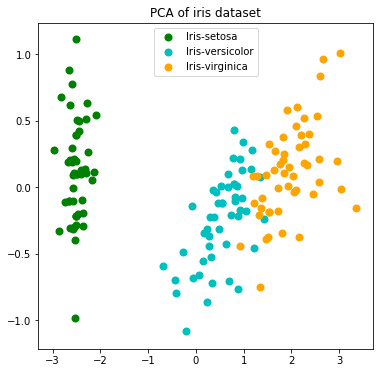

In [7]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# 加载数据
iris = pd.read_csv('iris.csv', usecols=range(5))
X=iris.iloc[:,1:4]
y = iris['classes']

# pca降维过程
pca = PCA(n_components=2)
pca.fit(X)
## 参考https://blog.csdn.net/weixin_44376037/article/details/122245411
X_pca = pca.transform(X)
# 计算第一主成分方差占比
fpc = pca.explained_variance_ratio_[0]

# 在低维空间中绘图
colors = ['green','c','orange'] # 色系选择
f,ax = plt.subplots(figsize=(6,6))
for color, label in zip(colors, y.unique()):
    plt.scatter(X_pca[y == label, 0], 
                X_pca[y == label, 1],
                color=color, 
                lw=2, 
                label=label)
plt.legend(loc="upper center")
plt.title("PCA of iris dataset")

# 请直接运行处结果，然后提交作业，该运行结果会自动一同提交上去

> 预期输出

![](https://ai-studio-static-online.cdn.bcebos.com/662dac8a81e64cd9b38b0def57707118270675c4e22f46aa9cc8e89bc88b255f)


## 任务3：距离计算

### 任务介绍
- 构建自定义函数cal_eculidean(array_a, array_b)函数，计算欧式距离。输入变量为ndarray类型数组，返回结果为二者之间的欧式距离；
- 针对测试集test_data中的每个数据样本，使用自定义函数计算其和训练集每个样本的欧式距离，保存在变量distances中。

> 待补全代码

In [33]:
import pandas as pd
import numpy as np
train_data = pd.read_table('gender.csv', sep = ',')
test_data = pd.read_table('test.csv', sep = ',')

# 请在下方作答 #

def cal_eculidean(array_a, array_b):
    
    ## 计算两个变量各个维度的差的平方
    array_square = np.power(array_a-array_b, 2)
    
    ## 计算差的平方和array_square_sum
    array_square_sum = array_square.sum()
    
    ## 开根号
    sum_root = np.sqrt(array_square_sum)
    
    return sum_root

## 储存距离的变量
distances = []

## 遍历`test_data`中的每个数据样本, 样本的储存格式为ndarray
for item in test_data.iloc[:,:-1].values:
    
    ## 储存数据样本和训练集中每个样本的距离，dist格式为字典类型，形如{index: distance}
    dist = {}
    
    for index, train_item in enumerate(train_data.iloc[:,:-1].values):
        
        ## 使用自定义函数计算item和train_item之间的欧式距离distance
        distance = cal_eculidean(item, train_item)
        ## 将distance和train_item的index存入字典变量dist中
        dist[index] = distance
    
    #将dist加入到distances中
    distances.append(dist)

print(distances)

[{0: 32.449961479175904, 1: 27.294688127912362, 2: 19.697715603592208, 3: 29.206163733020468, 4: 35.608987629529715, 5: 27.459060435491963, 6: 22.20360331117452, 7: 23.430749027719962, 8: 31.064449134018133, 9: 31.622776601683793, 10: 31.622776601683793, 11: 30.805843601498726, 12: 26.570660511172846, 13: 31.622776601683793, 14: 26.419689627245813, 15: 22.20360331117452, 16: 10.295630140987, 17: 18.973665961010276, 18: 29.206163733020468, 19: 29.206163733020468, 20: 26.92582403567252, 21: 33.28663395418648, 22: 26.40075756488817, 23: 28.319604517012593, 24: 21.633307652783937, 25: 34.0, 26: 26.90724809414742, 27: 29.154759474226502, 28: 30.4138126514911, 29: 33.12099032335839, 30: 33.97057550292606, 31: 19.6468827043885, 32: 22.360679774997898, 33: 21.93171219946131, 34: 33.97057550292606, 35: 40.22437072223753, 36: 30.886890422961002, 37: 39.408120990476064, 38: 21.095023109728988, 39: 22.80350850198276, 40: 32.7566787083184, 41: 22.20360331117452, 42: 32.55764119219941, 43: 27.459060

> 预期输出

![](https://ai-studio-static-online.cdn.bcebos.com/eda44e812f6447028e194790d4046d78c93bbbddd2084d069daa783f9c4195ec)



## 任务4：选择最近邻样本

### 任务介绍
- 对于distances中的每个字典元素的值进行递增排序，选择距离最小的K个样本，将样本的索引保存在变量index_list中。


> 待补全代码

In [47]:
# item = distances[0]
# sorted_item = sorted(item.items(), key = lambda x: x[1])[:11]  # 每个item都是一个字典
# list(zip(*sorted_item))[0]
# list(zip(*sorted_item))

In [91]:
## 声明储存K个邻居的index的列表
index_list = []
K = 11
## 遍历每个测试样本的与训练集的举例，item类型为dict
for item in distances:

    ## item的类型为dict，即{'index': distance}
    ## 使用sorted函数对item按照diatance进行升序排列,并取前K个距离最小的样本
    ## sorted_item形如[(index, distance),(index, distance)...(index, distance)]
    ## 参考https://blog.csdn.net/weixin_43603464/article/details/107198968
    # sorted_item = sorted(item, key=lambda x: item[x])[:K]  # 每个item都是一个字典
    ## 参考http://t.zoukankan.com/xueqiuxiang-p-14466960.html
    sorted_item = sorted(item.items(), key = lambda x: x[1])[:K]  # 这样排序得到的是元组, 上面那样排序得到的直接就是list了

    ## 使用zip函数从sorted_items中获取对应的index
    indexes = list(zip(*sorted_item))[0]
    
    ## 将获取的indexes加入到index_list中
    index_list.append(indexes)

index_list

[(143, 180, 182, 284, 118, 157, 153, 194, 242, 141, 121),
 (181, 160, 207, 212, 154, 252, 164, 128, 159, 186, 88),
 (182, 118, 143, 157, 180, 284, 141, 155, 153, 194, 242),
 (183, 170, 239, 73, 151, 270, 93, 99, 116, 199, 258),
 (110, 130, 184, 247, 299, 16, 56, 146, 158, 198, 64),
 (185, 178, 257, 70, 105, 122, 249, 103, 195, 250, 167),
 (186, 91, 255, 88, 187, 252, 154, 133, 269, 220, 164),
 (187, 91, 255, 133, 220, 186, 237, 269, 252, 154, 88),
 (188, 152, 163, 172, 241, 71, 61, 73, 92, 270, 288),
 (189, 256, 75, 111, 228, 159, 50, 215, 260, 128, 160),
 (190, 147, 211, 224, 74, 150, 202, 274, 121, 136, 145),
 (191, 296, 262, 65, 125, 134, 176, 222, 226, 287, 297),
 (192, 232, 101, 298, 51, 106, 108, 62, 115, 219, 261),
 (94, 193, 267, 120, 134, 262, 55, 137, 286, 296, 90),
 (153, 194, 242, 121, 150, 66, 83, 96, 143, 180, 224),
 (103, 195, 105, 169, 178, 209, 248, 250, 275, 283, 127),
 (179, 196, 205, 68, 81, 89, 102, 123, 201, 243, 244),
 (197, 272, 286, 119, 120, 138, 94, 193, 267,

> 预期输出

![](https://ai-studio-static-online.cdn.bcebos.com/ebe719d982d5428ea34d4d1a4cd512b406de27d7a8b84bc2aacc483d07044d92)


## 任务5：确定样本预测类别

### 任务介绍
- 按照index_list，对train_data进行切片，获取测试数据集中每个样本的K个邻居的数据记录neighbor_df；
- 针对每个测试样本，查看neighbor_df的特征gender的取值，获取出现频率最高的值，存入到数组pred_label中；
- 根据pred_label和test_data的特征gender取值，计算K近邻算法的正确率accuracy_rate。

> 待补全代码

In [81]:
# indexes = index_list[-1]
# train_data.iloc[list(indexes)]['gender'].value_counts().index[0]
# test_data
# np.array(test_data['gender']) - np.array([1 for i in range(len(test_data))])


In [82]:
## 声明预测类别数组
pred_label = []

## 遍历索引数组
for indexes in index_list:
    
    ## 获取测试样本K个邻居的数据记录neighbor_df,类型为Dataframe
    #### 参考https://blog.csdn.net/u013250861/article/details/124065734
    neighbor_df = train_data.iloc[list(indexes)]  # 按下标多行索引, 必须用list不能用元组, 吐了, 试了半天
    
    ## 找到出现频率最高的类别mode_value，类型为str
    mode_value = neighbor_df['gender'].value_counts().index[0]
    
    ## 将mode_value保存在pred_label
    pred_label.append(mode_value)
    
## 将取值作变换 ‘M’:1  ‘F’:0
pred_label = [1 if item == 'M' else 0 for item in pred_label]

## 预测值与真实值相减，获得结果diff
diff = np.array(test_data['gender']) - np.array(pred_label)

## 计算正确率
accuracy_rate = (len(test_data) - np.abs(diff).sum()) / len(test_data)
print(accuracy_rate)

0.9428571428571428


> 预期输出

![](https://ai-studio-static-online.cdn.bcebos.com/ec61aae5ceec4df98f7fa0a3423e47ef7df109d8d9d044f1b315fec95f545ab7)


## 任务6：K值的选择

### 任务介绍
- 根据任务3-任务5的代码，编写自定义函数knn_classify(train_data, test_data, k)；
- 在训练集train_data和测试集test_data上运行K近邻算法；
- 算法K的取值范围为[3, 20]，针对每个K，计算预测错误样本的个数error_num；
- 绘制折线图， x轴为K的取值范围，y轴为正确率。

> 待补全代码

[0.94285714 0.85714286 0.94285714 0.91428571 0.91428571 0.85714286
 0.88571429 0.85714286 0.94285714 0.88571429 0.91428571 0.88571429
 0.91428571 0.91428571 0.91428571 0.91428571 0.91428571]


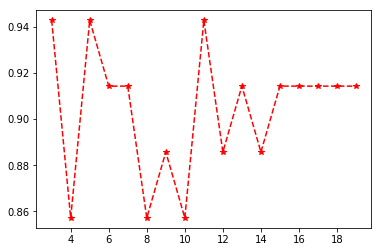

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
train_data = pd.read_table('gender.csv', sep = ',')
test_data = pd.read_table('test.csv', sep = ',')

# 自定义函数 knn_classify(train_data, test_data, k)；
def knn_classify(train_data, test_data, k):
    # 距离变量
    # 请在下方补充
    def cal_eculidean(array_a, array_b):
        ## 计算两个变量各个维度的差的平方
        array_square = np.power(array_a-array_b, 2)
        ## 计算差的平方和array_square_sum
        array_square_sum = array_square.sum()
        ## 开根号
        sum_root = np.sqrt(array_square_sum)
        return sum_root

    ## 储存距离的变量
    distances = []
    ## 遍历`test_data`中的每个数据样本, 样本的储存格式为ndarray
    for item in test_data.iloc[:,:-1].values: 
        ## 储存数据样本和训练集中每个样本的距离，dist格式为字典类型，形如{index: distance}
        dist = {}
        for index, train_item in enumerate(train_data.iloc[:,:-1].values):
            ## 使用自定义函数计算item和train_item之间的欧式距离distance
            distance = cal_eculidean(item, train_item)
            ## 将distance和train_item的index存入字典变量dist中
            dist[index] = distance
        #将dist加入到distances中
        distances.append(dist)

    # 获取K个样本的索引
    # 请在下方补充
    ## 声明储存K个邻居的index的列表
    index_list = []
    ## 遍历每个测试样本的与训练集的举例，item类型为dict
    for item in distances:
        ## item的类型为dict，即{'index': distance}
        ## 使用sorted函数对item按照diatance进行升序排列,并取前K个距离最小的样本
        ## sorted_item形如[(index, distance),(index, distance)...(index, distance)]
        ## 参考https://blog.csdn.net/weixin_43603464/article/details/107198968
        # sorted_item = sorted(item, key=lambda x: item[x])[:K]  # 每个item都是一个字典
        ## 参考http://t.zoukankan.com/xueqiuxiang-p-14466960.html
        sorted_item = sorted(item.items(), key = lambda x: x[1])[:k]  # 这样排序得到的是元组, 上面那样排序得到的直接就是list了
        ## 使用zip函数从sorted_items中获取对应的index
        indexes = list(zip(*sorted_item))[0]
        ## 将获取的indexes加入到index_list中
        index_list.append(indexes)

    # 确定样本预测类别
    # 请在下方补充
    ## 声明预测类别数组
    pred_label = []
    ## 遍历索引数组
    for indexes in index_list:
        ## 获取测试样本K个邻居的数据记录neighbor_df,类型为Dataframe
        #### 参考https://blog.csdn.net/u013250861/article/details/124065734
        neighbor_df = train_data.iloc[list(indexes)]  # 按下标多行索引, 必须用list不能用元组, 吐了, 试了半天 
        ## 找到出现频率最高的类别mode_value，类型为str
        mode_value = neighbor_df['gender'].value_counts().index[0]
        ## 将mode_value保存在pred_label
        pred_label.append(mode_value)

    return pred_label

## 声明保存预测错误样本个数列表
error = []

## K的取值范围
k_value = range(3, 20, 1)

## 遍历K = 3，4，5，6 ... 20
for num in k_value:
    
    ## 调用knn_classify函数，返回预测结果pred
    pred = knn_classify(train_data, test_data, num)
    
    ## 预测结果转换 ‘M’:1 'F':0
    pred = [1 if item == 'M' else 0 for item in pred]

    ## 预测值与真实值之差
    diff = np.array(test_data['gender']) - np.array(pred)

    ## 统计预测错误的样本个数
    error_num = np.abs(diff).sum()
    ## 将具体的K值对应的样本个数保存到列表error
    error.append(error_num)
    

## 计算正确率
rate_list = (len(test_data) - np.array(error)) / len(test_data)

print(rate_list)
## 绘制折线图
plt.plot(k_value, rate_list,  '--r*')
## 输出图像
plt.show()

> 预期输出

![](https://ai-studio-static-online.cdn.bcebos.com/3bcc83b6e2654194a1241d82eaee3d08bfe1a09348514e688ee87d01d49e55b2)
